Análise sobre os Publicadores de Contratos no PNCP

A análise sobre o Publicador de Contratos no Portal Nacional de Contratações Públicas (PNCP) destaca questões importantes relacionadas à adesão de órgãos públicos de diferentes esferas a essa ferramenta desenvolvida pelo Governo Federal. O objetivo principal da análise é avaliar o uso do Publicador e identificar padrões de adesão por parte dos órgãos públicos, especialmente no que diz respeito à preferência por outras opções de publicação de contratos.

Aqui estão alguns pontos-chave destacados na análise:1.	Solução para o Setor Público: O Publicador de Contratos no PNCP foi criado como uma solução para permitir que órgãos e entidades públicas cumpram os requisitos da nova legislação de licitações e contratos (Lei nº 14.133/2021). Ele visa preencher uma lacuna importante, oferecendo uma maneira simples e gratuita para estados, municípios, órgãos do poder judiciário e legislativo divulgarem informações sobre seus contratos, sem a necessidade de intermediários ou infraestrutura própia  ri
2.	Objetivo de Verificação da Adesão: O objetivo da análise é verificar em que medida os órgãos públicos de diferentes esferas estão aderindo ao Publicador do Governo Federal (Compras.gov.br). Isso é fundamental para entender como essa ferramenta está sendo adotada e se está cumprindo sua função de facilitar a publicação de contrto  at
3.	Risco de Integridade e Despesa Pública: A análise também ressalta um ponto crítico relacionado ao risco de integridade no processo de aquisição de bens e serviços utilizando recursos públicos. A contratação de empresas privadas para publicar os contratos no PNCP pode ser vista como um risco, uma vez que essas empresas não passam por auditorias e não são obrigadas a apresentar certificações que assegurem a segurança dos dados. Além disso, destaca-se o aumento das despesas públicas, visto que o Governo Federal oferece ferramentas semelhantes gratuitente  ae.
4.	Escopo da Análise: A análise abrange todos os contratos publicados no PNCP desde sua implantação em 2021 até outubro de 2023.


In [122]:
# para recarregar a biblioteca automaticamente, e não ter que restartar o kernel a cada mudança
%load_ext autoreload
%autoreload 2

#from analises import bibl_pncp

import pandas as pd
import numpy as np

#bibliotecas para visualização de dados (gráficos)
import matplotlib.pyplot as plt
#%matplotlib inline #para conseguir visualizar os gráficos no notebook
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('dados/dadosPNCP_completo_tratado.csv', low_memory=False) #low_memory = False: para corrigir o erro de dtype em algumas colunas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
from analises import bibl_grafico 

1 - Quantidade de contratos por Publicador

In [124]:
# PRIMEIRA ANÁLISE => Quantidades de contratos por UsuarioNome

df_usunome = df.groupby(['usuarioNome'])['numeroControlePNCP'].count().sort_values(ascending=False).reset_index()
df_usunome.columns = ['Publicador de Contrato',  'Quantidade de Contratos'] # Altere os nomes das colunas

# Calcular o percentual e criar a nova coluna
df_usunome['Percentual'] = (df_usunome['Quantidade de Contratos'] / df_usunome['Quantidade de Contratos'].sum()) * 100
df_usunome['Percentual'] = df_usunome['Percentual'].round(1)

df_usunome
# Conclusão: 101 usuarios diferentes

,Publicador de Contrato,Quantidade de Contratos,Percentual
0,Compras.gov.br,117849,54.8
1,Inovea Tecnologia Ltda,62644,29.1
2,Governançabrasil Tecnologia e Gestão em Serviços,5940,2.8
3,Megasoft Informática,5899,2.7
4,IPM Sistemas,2040,0.9
...,...,...,...
96,BR TRANSPARENCIA LTDA,2,0.0
97,Assembleia Legislativa do Estado de Goiás,2,0.0
98,DBseller Serviços de Informática,2,0.0
99,Portal de Compras Públicas do Estado do Rio de...,1,0.0


In [106]:
# construindo grafico treemaps

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'iframe'
fig = px.treemap(df_usunome, 
                 path = [px.Constant("Publicadores de Contratos"), 'Publicador de Contrato'], 
                 values = "Quantidade de Contratos", title='Quantidade de Contratos por Publicadores de Contratos',
                 color_continuous_scale='RdBu',       
                 color_continuous_midpoint=0)
                 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

#salva o gráfico em um arquivo pickle para usar na página streamlit
bibl_grafico.save_data(fig, 'treemap', 'publicadores_qtde_publicador')

filepath
C:\Users\gabiz\_PROJETO NOVO\projetoPNCP\dados\app\treemap-publicadores_qtde_publicador.pkl


In [125]:
# Separação dos DataFrames

#  df_maiores - Maiores usuarioNome , por quantidade de inserções realizadas
df_maiores = df.groupby(['usuarioNome'])['numeroControlePNCP'].count().sort_values(ascending=False).head(20).reset_index()
df_maiores.columns = ['Nome do Usuário',  'Quantidade de Contratos'] # Altere os nomes das colunas


# df_usuario - dataframe com as colunas úteis para análise usuario nome
colunas_a_remover = ['numeroControlePncpCompra', 'codigoPaisFornecedor',
       'dataPublicacaoPncp', 'dataAtualizacao', 'anoContrato',
       'numeroContratoEmpenho', 'dataAssinatura', 'dataVigenciaInicio',
       'dataVigenciaFim',  'tipoPessoa',
       'sequencialContrato', 
       'niFornecedorSubContratado', 'nomeFornecedorSubContratado',
       'informacaoComplementar', 'processo', 'unidadeSubRogada',
       'orgaoSubRogado',  'receita',
       'tipoPessoaSubContratada', 'objetoContrato', 'valorInicial',
       'numeroParcelas', 'valorParcela',  'valorAcumulado',
       'numeroRetificacao', 'identificadorCipi', 'urlCipi', 
       'tipoContrato_id', 'tipoContrato_nome', 'categoriaProcesso_id',
       'categoriaProcesso_nome']
df_usuario = df.drop(colunas_a_remover, axis=1) # remoção de colunas que não vai utilizar


#df_comprasgov - dataframe somente com as linhas em que o  usuario nome é 'Compras.gov.br'
df_comprasgov = df_usuario.loc[df['usuarioNome'] == 'Compras.gov.br']

#df_sem - dataframe somente SEM as linhas em que o  usuario nome é 'Compras.gov.br'
df_sem = df_usuario.drop(df_usuario[df_usuario['usuarioNome'] == 'Compras.gov.br'].index)

#df_sem.columns.values


2 - Comparativo de adesão ao Publicador do Governo Federal (Compras.gov.br) por ente federativo


In [126]:
# SEGUNDA ANÁLISE - Comparativo entre os entes federativos se estão utilizando o Compras.gov.br

# df_entes1 - entes que utilizaram o compras.gov.br
df_entes1 = df_comprasgov.groupby(['orgaoEntidade_esferaId'])['numeroControlePNCP'].count()
novo_nome = {'D': 'Distrito Federal', 'E': 'Estadual', 'F': 'Federal', 'M': 'Municipal',           
             'N': 'Não Classificada'} # Crie um dicionário com os novos nomes dos índices
df_entes1 = df_entes1.rename(index = novo_nome) # Renomeie as linhas usando .rename()

# df_entes2 - entes que não utilizaram o compras.gov.br
df_entes2 = df_sem.groupby(['orgaoEntidade_esferaId'])['numeroControlePNCP'].count()
df_entes2 = df_entes2.rename(index = novo_nome) # Renomeie as linhas usando .rename()

# df_entes - junção das duas tabelas
df_entes = pd.merge(df_entes1, df_entes2, on='orgaoEntidade_esferaId', how='outer').reset_index()
df_entes.columns = ['Esfera de Governo','Compras.gov.br', 'Outros Publicadores']


# Altere os nomes das colunas

df_entes



,Esfera de Governo,Compras.gov.br,Outros Publicadores
0,Distrito Federal,113.0,12
1,Estadual,7761.0,2109
2,Federal,108389.0,360
3,Municipal,1586.0,94460
4,Não Classificada,NaN,321


In [156]:
import plotly.express as px
import pandas as pd

# Criar um DataFrame
data = {'Entes': ['Estadual + DF', 'Federal', 'Municipal', 'Não Classificada'],
        'Compras.gov.br': [7874, 108389, 1586, 0],
        'Outros Publicadores': [2121, 360, 94460, 321]}
df = pd.DataFrame(data)

# Criar o gráfico de barras agrupadas
fig = px.bar(df, x='Entes', y=['Compras.gov.br', 'Outros Publicadores'],
             title='Publicador de Contrato X Ente da Federação',
             labels={'value': 'Quantidade de Contrato'},
             color_discrete_map={'Compras.gov.br': 'blue', 'Outros Publicadores': 'green'},
             barmode='group',  # Modo de barras agrupadas
             height=600)

# Personalizar a legenda
fig.update_layout(legend_title_text='Publicadores')
fig.update_traces(texttemplate='%{value}', textposition='outside')

# Exibir o gráfico
fig.show()


#salva o gráfico em um arquivo pickle para usar na página streamlit
bibl_grafico.save_data(fig, 'publicadores', 'barra_publicador_ente_2')



filepath
C:\Users\gabiz\_PROJETO NOVO\projetoPNCP\dados\app\publicadores-barra_publicador_ente_2.pkl


In [132]:
import plotly.express as px
import pandas as pd

# Criar um DataFrame
data = {'Entes': ['Estadual + DF', 'Federal', 'Municipal', 'Não Classificada'],
        'Compras.gov.br': [7874, 108389, 1586, 0],
        'Outros Publicadores': [2121, 360, 94460, 321]}
df = pd.DataFrame(data)

# Criar o gráfico de barras agrupadas
fig = px.bar(df, x='Entes', y=['Compras.gov.br', 'Outros Publicadores'],
             title='Publicador de Contrato X Ente da Federação',
             labels={'value': 'Quantidade de Contrato'},
             color_discrete_map={'Compras.gov.br': 'blue', 'Outros Publicadores': 'green'},
             height=600)

# Personalizar a legenda
fig.update_layout(legend_title_text='Publicadores')
fig.update_traces(texttemplate='%{value}', textposition='outside')

# Exibir o gráfico
fig.show()


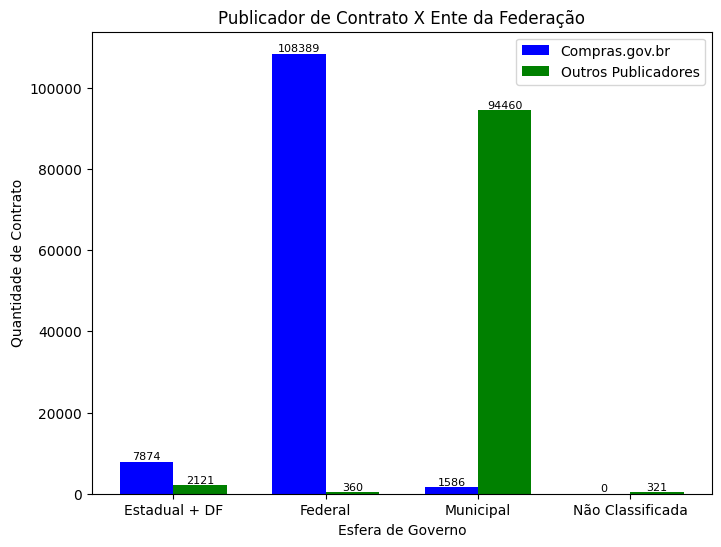

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# criar um data frame juntando Estados + DF
data = {'Entes': ['Estadual + DF', 'Federal', 'Municipal', 'Não Classificada'],
        'Compras.gov.br': [7874, 108389, 1586,0],
        'Outros Publicadores': [2121, 360, 94460, 321]}
df = pd.DataFrame(data)

# Defina a largura das barras e a posição dos grupos
largura_barra = 0.35
posicao_x = range(len(df))

# Crie o gráfico de barras agrupadas
plt.figure(figsize=(8, 6))

# Crie as barras
bar1 = plt.bar(posicao_x, df['Compras.gov.br'], largura_barra, label='Compras.gov.br', color='blue')
bar2 = plt.bar([p + largura_barra for p in posicao_x], df['Outros Publicadores'], largura_barra, label='Outros Publicadores', color='green')

# Adicione rótulos (labels) nas barras usando bar_label
plt.bar_label(bar1, fmt='%.0f', label_type='edge', fontsize=8)
plt.bar_label(bar2, fmt='%.0f', label_type='edge', fontsize=8)

# Configurações adicionais
plt.xlabel('Esfera de Governo')
plt.ylabel('Quantidade de Contrato')
plt.title('Publicador de Contrato X Ente da Federação')
plt.xticks([p + largura_barra / 2 for p in posicao_x], df['Entes'])
plt.legend()

# Mostrar o gráfico
plt.show()




3 - Órgãos da Esfera Federal que não estão utilizado o 'Compras.gov.br'

In [135]:
# TERCEIRA ANÁLISE => Órgãos da Esfera Federal que não estão utilizado o 'Compras.gov.br'

# df_fed - dataframe de entes federais que não utilizaram o 'Compras.gov.br'
df_fed = df_sem[df_sem['orgaoEntidade_esferaId'] == 'F']

# órgãos por esfera da União
df_fed.groupby(['orgaoEntidade_poderId','orgaoEntidade_razaoSocial'])['numeroControlePNCP'].nunique()

# arrumando a tabela
df_fed_esfera = df_fed.groupby(['orgaoEntidade_poderId','orgaoEntidade_razaoSocial']).agg({'numeroControlePNCP': 'count','unidadeOrgao_municipioNome': 'nunique'})
df_fed_esfera.columns = ['Quantidade de Contratos', 'orgao'] # Altere os nomes das colunas
del df_fed_esfera['orgao'] # retirando coluna indesejada
df_fed_esfera = df_fed_esfera.rename_axis(index={'orgaoEntidade_poderId': 'Poder', 'orgaoEntidade_razaoSocial': 'Órgãos Federais'}) # Renomear os índice
substituicao = {'E': 'Executivo', 'J': 'Judiciário'} # Crie um dicionário com os novos nomes dos índices
df_fed_esfera = df_fed_esfera.rename(index = substituicao) # Renomeie as linhas usando .rename()
df_fed_esfera


Quantidade de Contratos
Poder      Órgãos Federais                                                            
Executivo  CENTRO FED DE ED TECNOLOGICA CELSO SUCKOW DA FO...                        4
           CONSELHO REGIONAL DE ADMINISTRACAO DO ESPIRITO ...                        6
           CONSELHO REGIONAL DE ENGENHARIA E AGRONOMIA DO ...                      105
           CONSELHO REGIONAL DE FARMACIA                                             1
           CONSELHO REGIONAL DE MEDICINA VETERINARIA DO ES...                        1
           CONSELHO REGIONAL DE MEDICINA VETERINARIA DO ES...                        4
           CONSELHO REGIONAL DE MEDICINA VETERINARIA DO ES...                        5
           CONSELHO REGIONAL DE NUTRICIONISTAS SEXTA REGIAO                          4
           CONSELHO REGIONAL DOS TECNICOS INDUSTRIAIS DO R...                        2
           MINISTERIO PUBLICO DA UNIAO                                             131
Judiciário JUSTICA FEDERAL DE PRIMEIRA INSTANCIA                                    18
           SUPREMO TRIBUNAL FEDERAL                                                 20
           TRIBUNAL REGIONAL FEDERAL DA 2 REGIAO                                    59

In [153]:
import plotly.express as px

categorias = ['Executivo', 'Judiciário']
valores_executivo = [9]
valores_judiciario = [4]

cores = ['blue', 'red']  # Cores para as categorias

fig = px.bar(x=categorias, y=valores_executivo + valores_judiciario,
            text=valores_executivo + valores_judiciario,  # Define o texto a ser exibido nas barras
             title='Quantidade de Órgãos Federais que Não Utilizam o Publicador "Compras.gov.br"',
             labels={'x': 'Poder', 'y': 'Quantidade de Órgãos Federais'},
             color=categorias, color_discrete_sequence=cores)


fig.update_traces(showlegend=False)  # Remove a legenda

fig.show()

#salva o gráfico em um arquivo pickle para usar na página streamlit
bibl_grafico.save_data(fig, 'publicadores', 'barra_fed_outropub_4')

filepath
C:\Users\gabiz\_PROJETO NOVO\projetoPNCP\dados\app\publicadores-barra_fed_outropub_4.pkl


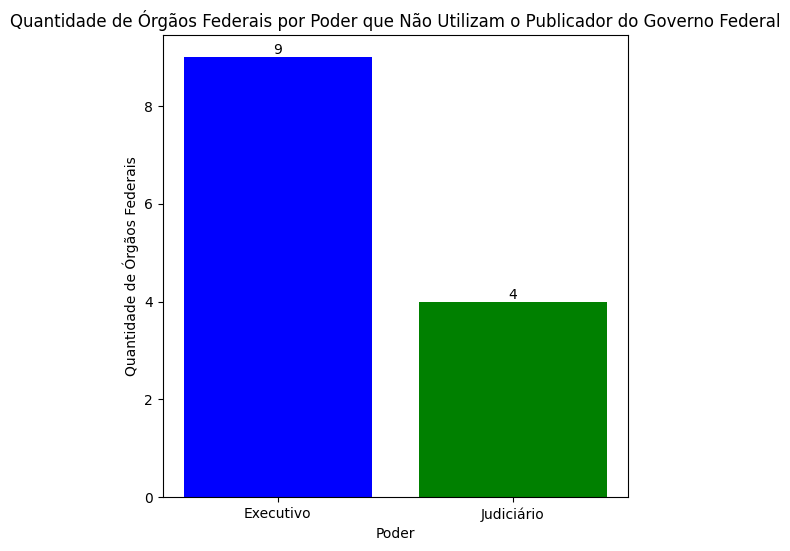

filepath
C:\Users\gabiz\_PROJETO NOVO\projetoPNCP\dados\app\publicadores-barra_4fed_outro_publicador.pkl


In [119]:
import matplotlib.pyplot as plt

# Dados para o gráfico
categorias = ['Executivo', 'Judiciário']
valores = [9, 4]
cores = ['blue', 'green']# Cores para as barras
# Criar o gráfico de barras empilhadas
plt.figure(figsize=(6, 6))
plt.bar(categorias, valores, color=cores)
# Adicionar rótulos nas barras
for i in range(len(categorias)):
    plt.text(categorias[i], valores[i], str(valores[i]), ha='center', va='bottom')
# Configurações adicionais
plt.xlabel('Poder')
plt.ylabel('Quantidade de Órgãos Federais')
plt.title('Quantidade de Órgãos Federais por Poder que Não Utilizam o Publicador do Governo Federal')
plt.show()



4 - Análise dos 10 maiores Publicadores, considerando a quantidade de contratos

In [147]:
# QUARTA ANÁLISE => Top 10 empresas - quais estados, quantidade municipio, quantidade de processo

#10 maiores usuarioNome , por quantidade de inserções realizadas, excluindo compras.gov
df_sem.groupby(['usuarioNome'])['usuarioNome'].count().sort_values(ascending=False).head(10)


# df_top10 - dataframe com os 10 maiores quantidade de alimentação por usuario nome, excluindo o 'Compras.gov.br'
# Suponha que você tenha um DataFrame chamado 'df' e deseja selecionar as linhas onde a coluna 'coluna_alvo' contenha um dos valores desejados.
valores_desejados = ['Inovea Tecnologia Ltda', 'Governançabrasil Tecnologia e Gestão em Serviços', 
                    'Megasoft Informática', 'IPM Sistemas', 'CENTI', 'LicitaCon - TCE-RS', 'SMARAPD INFORMATICA LTDA',
                    'Prodata Informática', 'ECustomize Consultoria em Software S.A', 'Grupo Assessor']  
df_top10 = df_sem[df_sem['usuarioNome'].isin(valores_desejados)] # Use o operador `|` para combinar várias condições.

# Top 10 empresas - quais estados estão atuando
df_top10.groupby(['usuarioNome'])['unidadeOrgao_ufSigla'].unique()

# Top 10 empresas - quantidade de municipio
df_top10.groupby(['usuarioNome'])['unidadeOrgao_municipioNome'].nunique()

# Top 10 empresas - quantidade de processos
df_top10.groupby(['usuarioNome'])['numeroControlePNCP'].count()

# df_top_format - dataframe já contendo os dados quais os estados,qtd de municípios e quantidade de processo
df_top_format = df_top10.groupby('usuarioNome').agg({'unidadeOrgao_ufSigla': 'unique', 'unidadeOrgao_municipioNome': 'nunique', 'numeroControlePNCP': 'count'}).sort_values(by= ['numeroControlePNCP'], ascending= False).reset_index()
df_top_format.columns = ['Publicador de Contratos', 'UF', 'Qtd de Municípios', 'Qtd de Contratos'] # Altere os nomes das colunas
df_top_format



,Publicador de Contratos,UF,Qtd de Municípios,Qtd de Contratos
0,Inovea Tecnologia Ltda,[SC],255,62644
1,Governançabrasil Tecnologia e Gestão em Serviços,"[SC, RS, PR, MG, SP]",74,5940
2,Megasoft Informática,"[GO, TO]",69,5899
3,IPM Sistemas,"[RS, SC, PR, MG]",71,2040
4,CENTI,[GO],34,1788
5,LicitaCon - TCE-RS,[RS],65,1468
6,SMARAPD INFORMATICA LTDA,"[MG, ES, SP]",6,1415
7,Prodata Informática,"[GO, TO]",17,1337
8,ECustomize Consultoria em Software S.A,"[MG, PB, BA, PE, RN, SP, PI, PA, CE, MA, TO, R...",73,1202
9,Grupo Assessor,"[SP, MS]",7,1119


In [148]:
# Top 10 empresas - quais estados estão atuando
df_publi = df_top10.groupby(['usuarioNome', 'unidadeOrgao_ufSigla'])['numeroControlePNCP'].count().reset_index()
df_publi.columns = ['Publicador de Contratos', 'UF', 'Qtd de Contratos']

# Gerar o Gráfico
pio.renderers.default = 'iframe'
fig = px.treemap(df_publi, 
                 path = ['Publicador de Contratos', 'UF'], 
                 values = 'Qtd de Contratos', title='Top 10 Publicadores de Contratos' ,
                 color_continuous_scale='RdBu',       
                 color_continuous_midpoint=0)
                 
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

#salva o gráfico em um arquivo pickle para usar na página streamlit
bibl_grafico.save_data(fig, 'publicadores', 'treemap_top10_3')

filepath
C:\Users\gabiz\_PROJETO NOVO\projetoPNCP\dados\app\publicadores-treemap_top10_3.pkl


Conclusão Final:

Preferência por Outros Publicadores: Conforme os dados fornecidos pela PNCP, a análise identifica que 45,2% das informações de contratos foram inseridas por meio de outros publicadores, sendo a grande maioria desses publicadores empresas privadas, principalmente com relação as Prefeituras Municipais, onde este percentual sobe para 98,3%.

Em resumo, a análise destaca a importância do Publicador de Contratos no PNCP como uma ferramenta pública e gratuita para órgãos públicos divulgarem seus contratos. No entanto, também aponta desafios relacionados à adesão e ao uso preferencial de outros publicadores, incluindo empresas privadas. Esses desafios levantam preocupações relacionadas à integridade do processo de aquisição e ao aumento dos gastos públicos.

É importante que o governo e os órgãos públicos considerem estratégias para promover o uso efetivo do Publicador do Governo Federal e para garantir a segurança e transparência das informações relacionadas aos contratos públicos.

